# Ali et al., (2016) radial diffusion coefficients
Similar to Figure 8 from the paper but with calculated coefficients (not obtained from data)

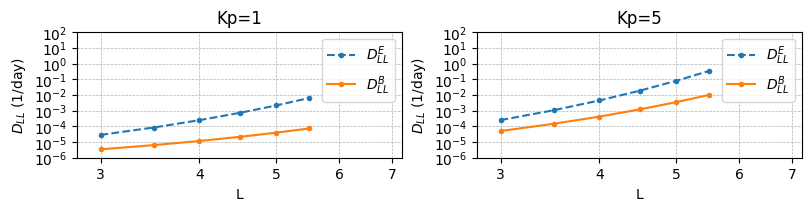

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from rbamlib.models.dll import A2016  # Ensure this library is available

# Define the range of L and Kp values
L = np.arange(3, 5.6, 0.5)
kp_values = [1, 5]

# Set up the subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 2), constrained_layout=True)

# Common settings for both plots
for ax, kp in zip(axs, kp_values):
    ax.set(xscale="log", yscale="log", xlim=(2.8, 7.2), ylim=(1.9e-5, 1.1e2))
    ax.set_xticks(range(3, 8))  # Set specific tick positions
    ax.set_yticks(np.logspace(-6, 2, 9))
    ax.set_xticklabels(map(str, range(3, 8))) # Set custom tick labels
    ax.set_xlabel('L')
    ax.set_ylabel('$D_{LL}$ (1/day)')
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    ax.set_title(f"Kp={kp}")    

# Plot data for each Kp value
for i, kp in enumerate(kp_values):
    kp_array = np.full(L.shape, kp)
    
    # Single call to A2016 for both dllm and dlle
    dllb, dlle = A2016(L=L, kp=kp_array, dll_type='both')
    
    # Plot results    
    axs[i].plot(L, dlle, label=r"$D_{LL}^E$", marker=".", linestyle="--")
    axs[i].plot(L, dllb, label=r"$D_{LL}^B$", marker=".")

    # Add legend only to the chosen subplot
    axs[i].legend(loc="upper right")

# Show the combined plot
plt.show()